# AUTOVETORES E AUTOVALORES

$$
Ax = x \lambda,
$$
onde: $A$ é a matriz, $x$ é o auto-vetor e $\lambda$ é o auto-valor correspondente.

Porém, se tivermos dois auto-vetores, e seus auto-valores correspondentes, temos na verdade um sistema:

$$
\begin{cases}
Ax_1 = x_1 \lambda_1 \\
Ax_2 = x_2 \lambda_2 
\end{cases}
$$
Esse sistema pode ser escrito na forma de uma multiplicação matricial, se assumirmos que nossos auto-vetores são vetores-coluna:

$$
A \begin{bmatrix} x_1 & x_2 \end{bmatrix} = \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} 
$$

Multiplicando os dois lados da equação por $\begin{bmatrix} x_1 & x_2 \end{bmatrix}^{-1}$, ficamos com:

$$
A \begin{bmatrix} x_1 & x_2 \end{bmatrix}\begin{bmatrix} x_1 & x_2 \end{bmatrix}^{-1} = \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} \begin{bmatrix} x_1 & x_2 \end{bmatrix}^{-1}
$$
e, portanto:
$$
A = \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} \begin{bmatrix} x_1 & x_2 \end{bmatrix}^{-1}
$$


para diversas iterações podemos escrever da seguinte forma:
$$
A^N = \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} \lambda_1^N & 0 \\ 0 & \lambda_2^N \end{bmatrix} \begin{bmatrix} x_1 & x_2 \end{bmatrix}^{-1}
$$ 

In [1]:
import numpy as np

A = np.array([[0, 0.95, 0.05], [0.9, 0, 0.1], [0.7, 0.3, 0]]) # ex
w, v = np.linalg.eig(A)   # w = autovalor / v = autovetor 

# propabilidade das bikes
p = np.array([[0, 0.95, 0.7],   # cada LINHA é a prob de cada estacao ir para a linha
              [0.9, 0, 0.3],    # no caso, a primeira linha é a 1a estacao, ent a 1a tem 0
              [0.1, 0.05, 0]])  # prob de ir pra ela mesma, a 2a tem 0.95 de ir pra 1a e a 
                                # 3a tem 0.7 de ir pra 1a
# n de bikes
b = np.array([[10],
              [10],
              [10]])

for _ in range(100):
  b = p @ b
b

array([[14.34180597],
       [13.54638245],
       [ 2.11181158]])

Explosão: Se algum autovalor é maior que 1 (ou seja, ∣𝜆∣>1), o sistema "explode", tendendo ao infinito ao longo de várias iterações. A presença de um autovalor maior que 1 faz com que as iterações sucessivas ampliem os valores do vetor de estados.

Colapso: Se todos os autovalores estão entre 0 e 1 (ou seja, 0<∣λ∣<1), o sistema "colapsa", tendendo a zero ao longo do tempo. Isso significa que, ao aplicar 𝐴 repetidamente, as iterações fazem com que o vetor de estados diminua gradualmente.


Equilíbrio: Se algum autovalor é exatamente 1 (ou seja, ∣λ∣=1) e os outros estão entre 0 e 1, o sistema "equilibra", tendendo a um valor constante não-zero ao longo de muitas iterações. Esse comportamento indica estabilidade.

In [2]:
# 1/5 é pq estamos tratando os sapos em MILHARES!
p = np.array([[0.8, 1/5],
              [-0.1, 1.1]])


# escrevemos 600 / 500 e NAO 600 / 500.000 porque os sapos sao representados em MILHARES!!!
cs = np.array([[600], 
               [500]])  


w, v = np.linalg.eig(A)

print(w)
print('-')
print(v)

# aqui conseguimos ver que pelo primeiro vetor ter valor 1, o sistema NAO vai colapsar, vai entrar em 
# uma constante, podemos tambem usar o primeiro vetor (linha da esquerda), para achar a proporcao!

# colapso / equilibrio / explosao

[ 1.         -0.91231056 -0.08768944]
-
[[-0.57735027 -0.69213549 -0.10624252]
 [-0.57735027  0.64793959 -0.04247924]
 [-0.57735027  0.31799803  0.99343245]]


## Covariância

A covariância é uma medida que indica o grau de variação conjunta entre duas variáveis. Dada uma matriz de dados onde cada coluna representa uma variável e cada linha representa uma observação, a covariância entre duas variáveis \( x \) e \( y \) pode ser calculada por:

$$
C = \frac{\sum_{n=0}^{N-1} (x_n - \bar{x})(y_n - \bar{y})}{N-1}
$$

onde:
- \( x_n \) e \( y_n \) são os valores individuais das variáveis,
- \( \bar{x} \) e \( \bar{y} \) são as médias das variáveis \( x \) e \( y \),
- \( N \) é o número de observações.

A matriz de covariância captura a covariância entre cada par de variáveis, sendo uma matriz simétrica onde os valores diagonais representam a variância de cada variável.

In [3]:
# Dados de exemplo
dados = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Cálculo da matriz de covariância
covariancia = np.cov(dados, rowvar=False)

print("Matriz de Covariância:\n", covariancia)

Matriz de Covariância:
 [[9. 9. 9.]
 [9. 9. 9.]
 [9. 9. 9.]]


Os autovalores e autovetores da matriz de covariância fornecem informações sobre as direções principais de variação dos dados. Dada uma matriz de covariância \( C \), os autovalores \( \lambda \) e autovetores \( v \) podem ser encontrados resolvendo a equação:

$$
C v = \lambda v
$$

### Interpretação dos Autovalores e Autovetores

1. **Autovalores**: Cada autovalor \( \lambda \) representa a quantidade de variabilidade dos dados ao longo da direção de seu autovetor correspondente.
   - Um autovalor maior indica uma direção com maior variância (mais "espalhamento" dos dados).
   - Um autovalor próximo de zero indica uma direção com pouca variação dos dados.

2. **Autovetores**: Os autovetores indicam as direções principais em que os dados se espalham. A direção do autovetor associado ao maior autovalor é chamada de "componente principal".

# Projeção de Dados em Dimensões Inferiores

Para visualizar dados de alta dimensão, podemos projetá-los em um espaço de dimensão mais baixa. Um dos métodos mais comuns para isso é a Análise de Componentes Principais (Principal Component Analysis - PCA), que utiliza autovalores e autovetores da matriz de covariância dos dados.

## Propriedades da Matriz de Autovetores

A matriz de autovetores \( P \) da matriz de covariância \( C \) possui uma propriedade importante:

$$
P^{-1} = P^T
$$

Isso significa que \( P \) é uma matriz ortonormal, o que permite simplificar operações de transformação em espaços de dimensão reduzida.

## Análise de Componentes Principais (PCA)

Quando trabalhamos com dados de alta dimensão, visualizar todos os pontos pode ser difícil devido ao número elevado de variáveis (features). O PCA resolve isso selecionando apenas os autovetores correspondentes aos maiores autovalores da matriz de covariância dos dados. Esse processo permite projetar os dados em um subespaço de menor dimensão, mantendo o máximo possível da variância original.

### Procedimento de PCA

1. **Calcular a Matriz de Covariância** \( C \): A matriz de covariância das features dos dados é calculada para entender como cada variável se correlaciona com as demais.
2. **Obter Autovalores e Autovetores**: A decomposição em autovalores e autovetores de \( C \) identifica as direções principais de variação.
3. **Selecionar Componentes Principais**: Selecionam-se os autovetores correspondentes aos maiores autovalores, pois essas direções capturam a maior parte da variabilidade dos dados.
4. **Projeção dos Dados**: Os dados originais são projetados nos componentes principais, criando uma representação em menor dimensão com mínima distorção.

Se representarmos nossos dados originais como \( X \) e a matriz de componentes principais como \( V \), a projeção dos dados em duas dimensões pode ser escrita como:

$$
Y = XV
$$

## Utilizando Bibliotecas para PCA

Para realizar uma projeção PCA de forma prática, podemos utilizar a biblioteca `sklearn`, que possui uma implementação eficiente do PCA.


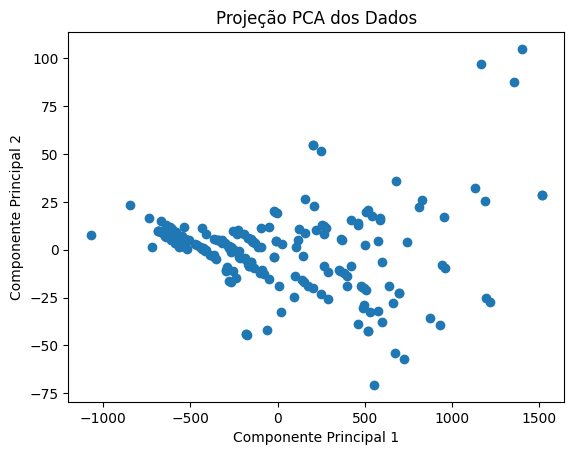

Componentes Principais:
 [[-5.42150454e-04  8.95069264e-03  2.07368594e-02  3.56278458e-03
   1.37927815e-03  9.97323405e-01  6.79625261e-02  1.14694308e-03
  -9.49286407e-03 -1.05199763e-02]
 [ 1.03076852e-02 -5.21714124e-02 -7.59527828e-02 -1.16601700e-03
  -4.10080166e-02 -6.55098549e-02  9.92011389e-01 -3.60580417e-02
  -6.45257014e-03 -3.14760181e-04]]
Variância Explicada: [0.99785579 0.00176616]


In [5]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Carregar e preparar os dados
df = pd.read_csv('Automobile_data.csv').select_dtypes(['number'])
X = df.to_numpy()

# Aplicar PCA para reduzir a dimensão para 2 componentes
pca = PCA(2)
Y = pca.fit_transform(X)

# Visualizar os dados projetados
plt.figure()
plt.scatter(Y[:, 0], Y[:, 1])
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Projeção PCA dos Dados")
plt.show()

# Exibir componentes principais e variância explicada
print("Componentes Principais:\n", pca.components_)
print("Variância Explicada:", pca.explained_variance_ratio_)


In [4]:
import numpy as np

# Matriz de exemplo
A = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])

# Cálculo da SVD
u, s, vt = np.linalg.svd(A)

print("Matriz U:\n", u)
print("Sigma:", s)
print("Matriz V transposta:\n", vt)

Matriz U:
 [[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]]
Sigma: [1.68481034e+01 1.06836951e+00 4.41842475e-16]
Matriz V transposta:
 [[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [-0.40824829  0.81649658 -0.40824829]]


# Decomposição em Valores Singulares (SVD)

A decomposição em valores singulares (Singular Value Decomposition - SVD) é uma técnica que permite fatorar uma matriz \( A \) em três componentes fundamentais:

$$
A = U \Sigma V^T
$$

onde:
- \( U \) é uma matriz cujas colunas são autovetores de \( A A^T \),
- \( V \) é uma matriz cujas colunas são autovetores de \( A^T A \),
- \( \Sigma \) é uma matriz diagonal cujos elementos \( \sigma_{i,i} \) representam os valores singulares, que são as raízes quadradas dos autovalores de \( A^T A \) (ou \( A A^T \)).

### Propriedades do SVD

- A decomposição SVD funciona para qualquer matriz \( A \), seja ela quadrada ou retangular.
- Quando \( A \) não é quadrada, as dimensões de \( U \), \( \Sigma \), e \( V^T \) variam para acomodar as dimensões originais de \( A \).
- O SVD é uma ferramenta poderosa para várias aplicações, como redução de dimensionalidade, compressão de dados, e remoção de ruídos em imagens.

## Comparação entre SVD e PCA

- **PCA**: Baseia-se na matriz de covariância \( C = A A^T \) para encontrar os componentes principais, que são os autovetores de \( C \).
- **SVD**: Utiliza uma decomposição direta de \( A \), o que permite encontrar os componentes principais sem calcular explicitamente a matriz de covariância.

### Componentes do SVD e PCA

Em SVD:
- As colunas de \( U \) são autovetores de \( A A^T \).
- As colunas de \( V \) (linhas de \( V^T \)) são autovetores de \( A^T A \).
- A matriz \( \Sigma \) contém os valores singulares, que são as raízes dos autovalores de \( A^T A \) ou \( A A^T \).

### Usando SVD para Encontrar Componentes Principais

A decomposição SVD pode ser usada para identificar as direções principais (componentes principais) de variação em \( A \), similar ao PCA. As colunas de \( V \) correspondentes aos maiores valores singulares na matriz \( \Sigma \) indicam as direções principais.

## Aplicações do SVD em Imagens

### Manipulação de Imagens

Ao manipular a matriz \( \Sigma \), podemos modificar a qualidade e os detalhes de uma imagem. Remover ou modificar os valores singulares altera a quantidade de informação contida na imagem reconstruída.

#### Exemplo: Remoção de Ruídos

1. Realize a decomposição SVD de uma imagem.
2. Remova os elementos de menor magnitude de \( \Sigma \) (correspondentes a menores valores singulares).
3. Reconstituir a imagem a partir das matrizes modificadas \( U \), \( \Sigma \), e \( V^T \) pode ajudar a remover ruídos.

#### Exemplo: Compressão de Imagens

A compressão de imagens usando SVD é possível "apagando" elementos de \( \Sigma \):
- Remover valores singulares menores em \( \Sigma \) equivale a descartar informações menos relevantes, reduzindo o espaço necessário para armazenar a imagem.
- A quantidade de valores singulares que mantemos (definida por \( K \)) controla a qualidade final da imagem e o nível de compressão.

### Parâmetro de Compressão \( K \)

- **Influência de \( K \)**: Um valor menor de \( K \) aumenta a compressão, mas reduz a qualidade. Um \( K \) maior preserva mais detalhes, mas resulta em menor compressão.
- **Menor \( K \) sem Perda de Qualidade**: Geralmente, valores entre 50 e 100 são suficientes para preservar a qualidade visual.
- **Maior \( K \) para Redução de Tamanho**: O valor ideal de \( K \) depende do equilíbrio entre qualidade desejada e espaço de armazenamento.




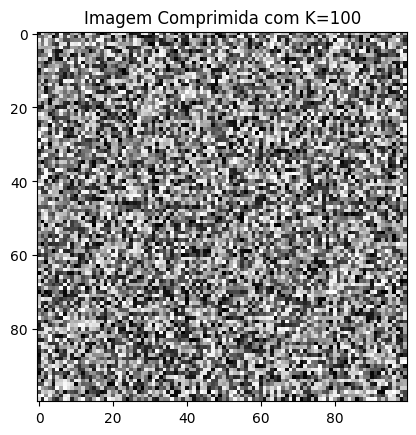

In [6]:
### Exemplo de Código para Compressão

from scipy.linalg import svd, diagsvd
import numpy as np
import matplotlib.pyplot as plt

def compress_image(A, K):
    u, s, vt = svd(A, full_matrices=False)
    sigma = diagsvd(s[:K], K, K)  
    compressed_A = u[:, :K] @ sigma @ vt[:K, :]
    return compressed_A

A = np.random.rand(100, 100)  
K = 100
compressed_A = compress_image(A, K)

# Mostrar a imagem comprimida
plt.imshow(compressed_A, cmap='gray')
plt.title(f"Imagem Comprimida com K={K}")
plt.show()